# Stroop Task Analysis

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.


First, we load the data and take a look at it.

In [2]:
import pandas as pd
stroop_data = pd.read_csv(r'stroopdata.csv')
stroop_data.shape

(24, 2)

In [3]:
stroop_data.columns

Index([u'Congruent', u'Incongruent'], dtype='object')

In [4]:
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


*1.What is our independent variable? What is our dependent variable?*

The color of the word is independent variable, it is controlled in the experiment. The time it takes to name the ink colors in equally-sized lists is dependent variable, it is ralated to whether the colors match the words.


*2.What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.*



In [5]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


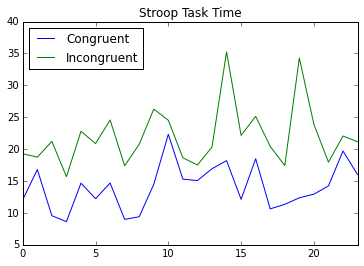

In [14]:
%matplotlib inline
stroop_data.plot(title = 'Stroop Task Time')

*3.Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*

There are 24 samples in this dataset, from the figure above, at each point, the time in incongruent group is higher than that of congruent group. The mean time for congruent and incongruent group is 14.05 and 22.02 respectively. The variance of congruent group is 3.56 whereas that of incongruent is 4.80. Obviously the incongruent group has higher mean time and variance. Also, the minium time of incongruent is 15.7, larger than 50% of congruent group. 


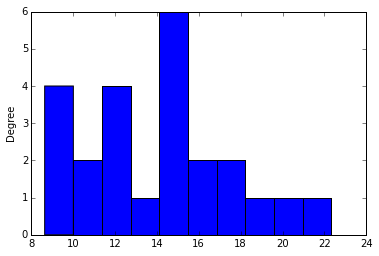

In [30]:
stroop_data.Congruent.plot(kind='hist',bins=10)

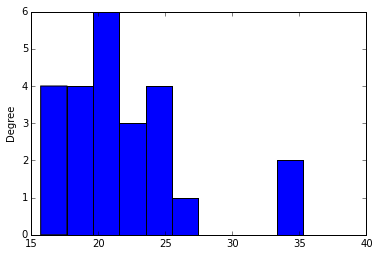

In [28]:
stroop_data.Incongruent.plot(kind='hist',bins=10)

4.Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.


5.Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


6.Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!